In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import umap
import umap.plot


In [1]:
#Import ECG data
df=pd.read_csv('ecg.csv', header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [4]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
136    0
137    0
138    0
139    0
140    0
Length: 141, dtype: int64

In [5]:
#rename boolean abnormal column
df.rename(columns={140: 'normal'}, inplace=True)

In [6]:
df.shape


(4998, 141)

In [7]:
# How balanced is the dataset
df.normal.value_counts()

1.0    2919
0.0    2079
Name: normal, dtype: int64

In [8]:
df.normal.value_counts(normalize=True)

NumExpr defaulting to 8 threads.


1.0    0.584034
0.0    0.415966
Name: normal, dtype: float64

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,normal
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [10]:
from sklearn.model_selection import train_test_split


---

Split into training, validation, and testing datasets

In [11]:
def split_my_data(df, pct=0.10):
    '''
    This splits a dataframe into train, validate, and test sets. 
    df = dataframe to split
    pct = size of the test set, 1/2 of size of the validate set
    Returns three dataframes (train, validate, test)
    '''
    train_validate, test = train_test_split(
        df, test_size=pct, random_state=123)
    train, validate = train_test_split(
        train_validate, test_size=pct*2, random_state=123)
    return train, validate, test

In [12]:
train, validate, test = split_my_data(df)

In [13]:
train.shape

(3598, 141)

In [14]:
print(train.shape)
print(validate.shape)
print(test.shape)

(3598, 141)
(900, 141)
(500, 141)


---

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,normal
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Split  x/y data/target

In [16]:
def split_xy(train, validate, test):
    '''
    Splits dataframe into train, validate, and test data frames
    '''
    X_train = train.drop(columns='normal')
    y_train = train.normal

    X_validate = validate.drop(columns='normal')
    y_validate = validate.normal

    X_test = test.drop(columns='normal')
    y_test = test.normal

    return train, X_train, y_train, X_validate, y_validate, X_test, y_test

In [17]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test = split_xy(train, validate, test)

---

Make dataframes of training data for normal and abnormal readings

In [18]:
normal_train=train[train.normal==1]
abnormal_train=train[train.normal==0]

In [19]:
import matplotlib.pyplot as plt


In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,normal
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


---

Plot normal ecg

In [21]:
df[0]

0      -0.112522
1      -1.100878
2      -0.567088
3       0.490473
4       0.800232
          ...   
4993    0.608558
4994   -2.060402
4995   -1.122969
4996   -0.547705
4997   -1.351779
Name: 0, Length: 4998, dtype: float64

In [22]:
import numpy as np

In [23]:
np.arange(140)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [24]:
normal_train.shape

(2126, 141)

In [25]:
import seaborn as sns

In [26]:
X_train.shape

(3598, 140)

In [27]:
len(X_train[0])

3598

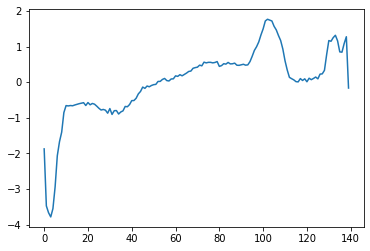

In [28]:
plt.plot(np.arange(140), X_train.iloc[0]);

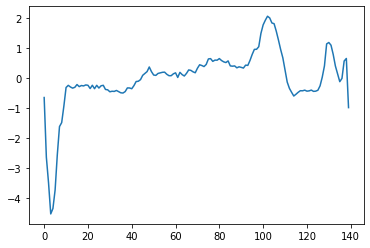

In [29]:
plt.plot(np.arange(140), X_train.iloc[1]);

In [30]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,normal
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


---

Need to normalize data before going too far... Look into domain - specific techniques and norms

I would prefer the dataframe to be transposed where each column represents an observation... I would also like to figure out what the sampling interval is for the data and convert the index into a real-world timestamp data. Need to look at date time object types to see if there's just an  - elapsed seconds sort of thing, independent of a actual clock time

Single-cycle rhythms don't capture many salient features of ecg data...

Consider alternate dataset... https://github.com/darkbiologist/ECG-Anomaly-Detection-Using-Deep-Learning

https://physionet.org/content/challenge-2017/1.0.0/



---

# New Dataset

https://physionet.org/content/challenge-2017/1.0.0/

The data from each observation are stored as .mat matlab files with an accompanying .hea file which appears to be a text file containing waveform information, though I am still uncertain what all the numbers represent and am trying to locate that within the challenge data.

### Dataset details

8,528 single lead ECG recordings lasting from 9 s to just over 60 s (see Table 2) and the test set contains 3,658 ECG recordings of similar lengths. The test set is unavailable to the public and will remain private for the purpose of scoring for the duration of the Challenge and for some period afterwards.

ECG recordings were sampled as 300 Hz and they have been band pass filtered by the AliveCor device. All data are provided in MATLAB V4 WFDB-compliant format (each including a .mat file containing the ECG and a .hea file containing the waveform information). 

<table>
	<caption><strong>Table 2:</strong> Data profile for the training set.</caption>
	<tbody>
		<tr>
			<th rowspan="2">Type</th>
			<th rowspan="2"># recording</th>
			<th colspan="5" style="text-align: center;">Time length (s)</th>
		</tr>
		<tr>
			<th>Mean</th>
			<th>SD</th>
			<th>Max</th>
			<th>Median</th>
			<th>Min</th>
		</tr>
		<tr>
			<th>Normal</th>
			<td>5154</td>
			<td>31.9</td>
			<td>10.0</td>
			<td>61.0</td>
			<td>30</td>
			<td>9.0</td>
		</tr>
		<tr>
			<th>AF</th>
			<td>771</td>
			<td>31.6</td>
			<td>12.5</td>
			<td>60</td>
			<td>30</td>
			<td>10.0</td>
		</tr>
		<tr>
			<th>Other rhythm</th>
			<td>2557</td>
			<td>34.1</td>
			<td>11.8</td>
			<td>60.9</td>
			<td>30</td>
			<td>9.1</td>
		</tr>
		<tr>
			<th>Noisy</th>
			<td>46</td>
			<td>27.1</td>
			<td>9.0</td>
			<td>60</td>
			<td>30</td>
			<td>10.2</td>
		</tr>
		<tr>
			<th><strong>Total</strong></th>
			<td><strong>8528</strong></td>
			<td><strong>32.5</strong></td>
			<td><strong>10.9</strong></td>
			<td><strong>61.0</strong></td>
			<td><strong>30</strong></td>
			<td><strong>9.0</strong></td>
		</tr>
	</tbody>
</table>

More details of the training set can be seen in Table 2. 

Figure 1 shows the examples of the ECG waveforms (lasting for 20 s) for the four classes in this Challenge. From top to bottom, they are ECG waveforms of normal rhythm, AF rhythm, other rhythm and noisy recordings.

![sample_waveforms](images/example_waveforms-01.png)

## Load .mat in python


In [31]:
import scipy.io
import os

In [34]:
# Path
path = '/Users/jaredgodar/codeup-data-science/ecg_anomaly_detection/training2017/'

In [36]:
file2=path+'A00002.mat'

In [37]:
file2

'/Users/jaredgodar/codeup-data-science/ecg_anomaly_detection/training2017/A00002.mat'

In [38]:
file='/Users/jaredgodar/codeup-data-science/ecg_anomaly_detection/training2017/A00001.mat'

In [39]:
ecg1 = scipy.io.loadmat(file)

In [40]:
ecg2 = scipy.io.loadmat(file2)

In [41]:
ecg1

{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}

In [42]:
ecg2

{'val': array([[128, 157, 189, ...,   0,   1,   2]], dtype=int16)}

In [43]:
ecg1

{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}

In [44]:
import numpy as np

In [45]:
ecg1=np.array(ecg1)

In [46]:
ecg1

array({'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)},
      dtype=object)

---

Plot individual beat with +/- 3 second window

In [48]:
ecg1=pd.DataFrame(ecg1)

ValueError: Must pass 2-d input. shape=()

Make annotated plot?

In [49]:
left = ab_index[1]-1080
right = ab_index[1]+1080

plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()

NameError: name 'ab_index' is not defined